In [45]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [46]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [47]:
data = pd.read_csv("C:/Users/hkvij/Desktop/upgrad/Kaggle Competition/telecom-churn-case-study-hackathon/train.csv")
unseen = pd.read_csv("C:/Users/hkvij/Desktop/upgrad/Kaggle Competition/telecom-churn-case-study-hackathon/test.csv")
sample = pd.read_csv("C:/Users/hkvij/Desktop/upgrad/Kaggle Competition/telecom-churn-case-study-hackathon/sample.csv")
data_dict = pd.read_csv("C:/Users/hkvij/Desktop/upgrad/Kaggle Competition/telecom-churn-case-study-hackathon/data_dictionary.csv")

print(data.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [48]:
# Selecting relevant columns (following the approach in the notebook)
ids = ['id', 'circle_id']
churn_probability = ['churn_probability']

In [49]:
# Based on the notebook, defining the feature categories
total_amounts = [col for col in data.columns if 'total' in col and 'amt' in col]
total_outgoing_minutes = [col for col in data.columns if 'total' in col and 'og' in col and 'mou' in col]
offnetwork_minutes = [col for col in data.columns if 'offnet' in col]
average_revenue_3g = [col for col in data.columns if 'arpu' in col and '3g' in col]
average_revenue_2g = [col for col in data.columns if 'arpu' in col and '2g' in col]
volume_3g = [col for col in data.columns if 'vol' in col and '3g' in col]
volume_2g = [col for col in data.columns if 'vol' in col and '2g' in col]
age_on_network = ['aon']

In [50]:
# Combining selected features
selected_features = ids + total_amounts + total_outgoing_minutes + offnetwork_minutes + \
                    average_revenue_3g + average_revenue_2g + volume_3g + volume_2g + \
                    age_on_network + churn_probability

In [51]:
# Filtering the training data
train_data_filtered = data[selected_features].set_index('id')

In [52]:
# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data_filtered)

In [53]:
# Converting the imputed data back to a DataFrame
train_data_imputed_df = pd.DataFrame(train_data_imputed, columns=train_data_filtered.columns, index=train_data_filtered.index)

In [54]:
# Splitting the data into features (X) and target (y)
X = train_data_imputed_df.drop(columns=['churn_probability'])
y = train_data_imputed_df['churn_probability']

In [55]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((55999, 23), (14000, 23), (55999,), (14000,))

In [57]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [58]:
y_val_pred_log_reg = log_reg.predict(X_val)

In [59]:
conf_matrix_log_reg = confusion_matrix(y_val, y_val_pred_log_reg)
precision_log_reg = precision_score(y_val, y_val_pred_log_reg)
recall_log_reg = recall_score(y_val, y_val_pred_log_reg)
accuracy_log_reg = accuracy_score(y_val, y_val_pred_log_reg)

print("Confusion Matrix:\n", conf_matrix_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("Accuracy:", accuracy_log_reg)

Confusion Matrix:
 [[12505    73]
 [ 1281   141]]
Precision: 0.6588785046728972
Recall: 0.09915611814345991
Accuracy: 0.9032857142857142


# Decision Tree


In [60]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

In [61]:
# Define relevant columns
ids = ['id', 'circle_id']
churn_probability = ['churn_probability']

# Feature selection based on initial approach
total_amounts = [col for col in data.columns if 'total' in col and 'amt' in col]
total_outgoing_minutes = [col for col in data.columns if 'total' in col and 'og' in col and 'mou' in col]
offnetwork_minutes = [col for col in data.columns if 'offnet' in col]
average_revenue_3g = [col for col in data.columns if 'arpu' in col and '3g' in col]
average_revenue_2g = [col for col in data.columns if 'arpu' in col and '2g' in col]
volume_3g = [col for col in data.columns if 'vol' in col and '3g' in col]
volume_2g = [col for col in data.columns if 'vol' in col and '2g' in col]
age_on_network = ['aon']

# Combine selected features
selected_features = ids + total_amounts + total_outgoing_minutes + offnetwork_minutes + \
                    average_revenue_3g + average_revenue_2g + volume_3g + volume_2g + \
                    age_on_network + churn_probability



In [62]:
# Filter the training data
train_data_filtered = data[selected_features].set_index('id')

In [63]:
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data_filtered)

In [64]:
# Convert the imputed data back to a DataFrame
train_data_imputed_df = pd.DataFrame(train_data_imputed, columns=train_data_filtered.columns, index=train_data_filtered.index)


In [65]:
# Split the data into features (X) and target (y)
X = train_data_imputed_df.drop(columns=['churn_probability'])
y = train_data_imputed_df['churn_probability']
X,y

(       circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
 id                                                                       
 0          109.0              77.0              65.0              10.0   
 1          109.0               0.0             145.0              50.0   
 2          109.0              70.0             120.0               0.0   
 3          109.0             160.0             240.0             130.0   
 4          109.0             290.0             136.0             122.0   
 ...          ...               ...               ...               ...   
 69994      109.0              50.0             397.0             512.0   
 69995      109.0             200.0             313.0             308.0   
 69996      109.0             626.0             250.0             397.0   
 69997      109.0             379.0             252.0             145.0   
 69998      109.0             198.0              50.0             198.0   
 
        total_og_mou_6 

In [66]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
X_train, X_val, y_train, y_val

(array([[ 0.        , -0.81180887, -0.78424252, ..., -0.2427144 ,
         -0.2352301 , -0.86688659],
        [ 0.        , -0.38133763, -0.64557905, ..., -0.2427144 ,
         -0.2352301 , -0.74089169],
        [ 0.        , -0.61389106, -0.58962713, ..., -0.2427144 ,
         -0.2352301 , -0.65689509],
        ...,
        [ 0.        ,  0.01202403, -0.40960789, ...,  0.40561089,
          0.51507534, -0.87633621],
        [ 0.        ,  0.66267885,  0.97459407, ..., -0.22011988,
         -0.2352301 ,  2.00894696],
        [ 0.        , -0.24279515, -0.2490502 , ..., -0.2427144 ,
         -0.2352301 , -1.0569289 ]]),
 array([[ 0.00000000e+00,  2.96099948e+00,  3.60676721e+00, ...,
         -2.42714400e-01, -2.35230099e-01, -5.79198241e-01],
        [ 0.00000000e+00,  7.71533649e-01,  4.05344051e-01, ...,
          3.64827074e-01, -1.98956029e-01, -7.94439525e-01],
        [ 0.00000000e+00,  1.03377475e+00,  8.11603677e-01, ...,
         -2.42714400e-01, -2.35230099e-01, -8.56387016e-

In [75]:
# Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier(random_state=42,max_depth=3)
tree_clf

DecisionTreeClassifier(max_depth=3, random_state=42)

In [76]:
# Train the model
tree_clf.fit(X_train, y_train)

feature_names = X.columns.tolist()

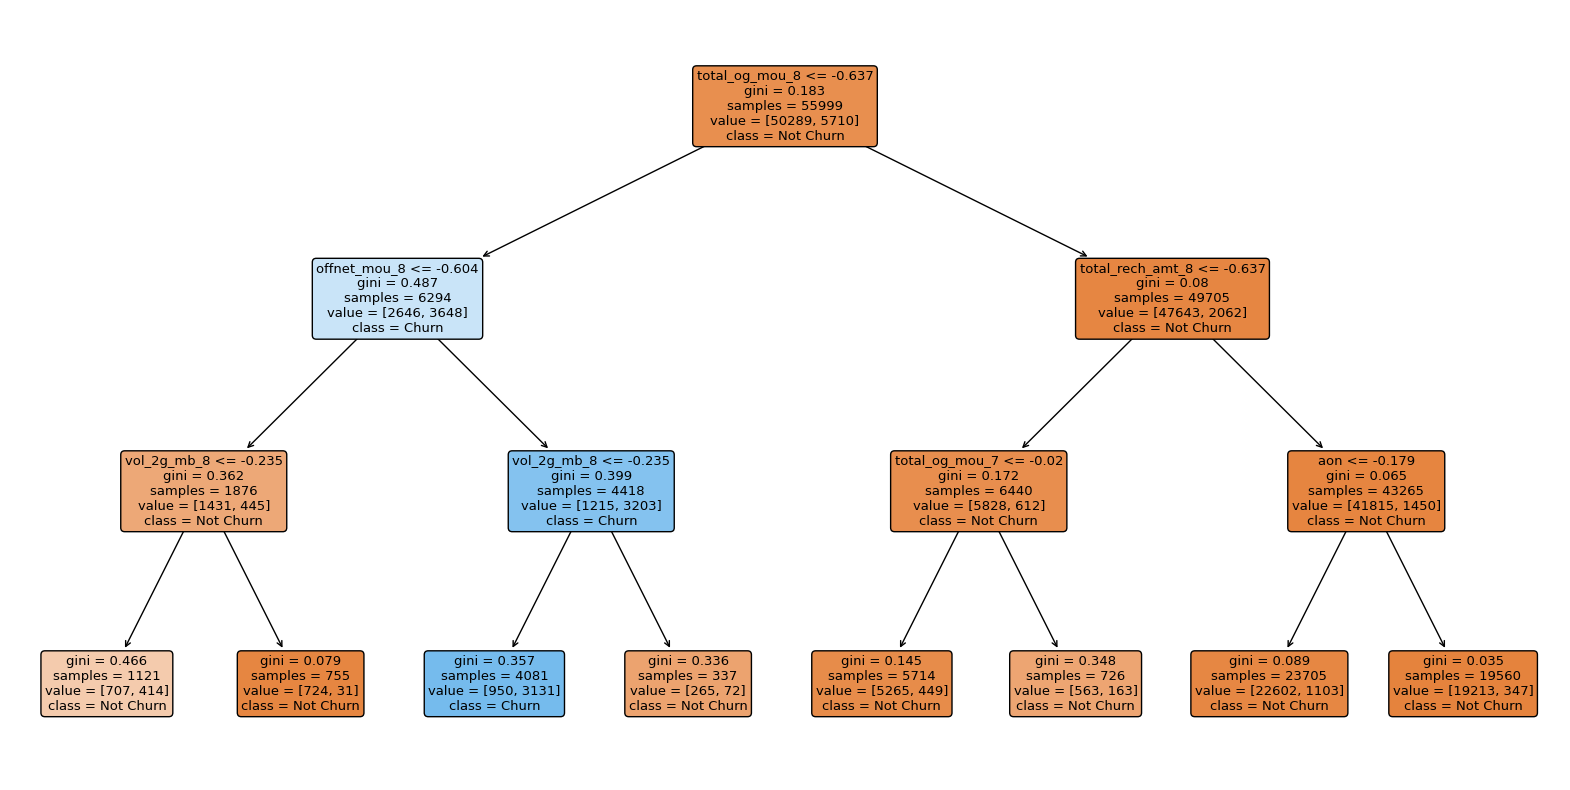

In [77]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_clf, feature_names=feature_names, class_names=['Not Churn', 'Churn'], filled=True, rounded=True)
plt.show()

In [78]:
y_val_pred_tree = tree_clf.predict(X_val)

In [79]:
conf_matrix_tree = confusion_matrix(y_val, y_val_pred_tree)
precision_tree = precision_score(y_val, y_val_pred_tree)
recall_tree = recall_score(y_val, y_val_pred_tree)
accuracy_tree = accuracy_score(y_val, y_val_pred_tree)

print("Confusion Matrix:\n", conf_matrix_tree)
print("Precision:", precision_tree)
print("Recall:", recall_tree)
print("Accuracy:", accuracy_tree)

Confusion Matrix:
 [[12327   251]
 [  603   819]]
Precision: 0.7654205607476635
Recall: 0.5759493670886076
Accuracy: 0.939
